# Cheat sheet

#### Models
1. Linear Regression
2. Locally Weighted Linear Regression
3. Logistic Regression
4. Softmax Regression
5. Gaussian Discriminant Analysis/(Multinomial Naive Bayes)
6. Support Vector Machines

#### Preprocessing
1. Standard Scaler
2. Min-Max Scaler
3. Polynomial Features
4. Split Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Models**

## 1. Linear Regression

In [2]:
class LinearRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = X@theta
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = 1/2*(self.h(X,theta)-y).T@(self.h(X,theta)-y)
        else:
            J = 1/(2*X.shape[0])*(self.h(X,theta)-y).T@(self.h(X,theta)-y)
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = X.T@(self.h(X,theta)-y)
        else:
            dJ = X.T@(self.h(X,theta)-y)/(X.shape[0])
        return dJ
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            theta = theta - alpha*gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
#5. normal equation
    def normal_equation(self, X, y):
        theta = np.linalg.inv(X.T@X)@X.T@y
        return theta
            
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        return prediction
    
#6. score/error calculation
    def mean_squared_error(self,X,y,theta):
        mse = self.cost(X,y,theta,average = True)*2
        return mse
        
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(0,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

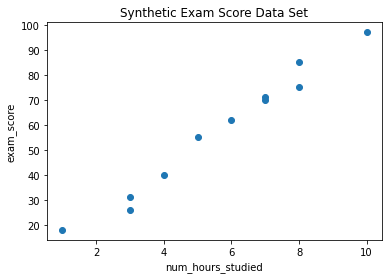

In [3]:
# Independent variable

num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])

# Dependent variable

exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data

plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

In [4]:
# Add dummy variable for intercept term to design matrix.
# Understand the numpy insert function by reading https://numpy.org/doc/stable/reference/generated/numpy.insert.html

X = np.array([num_hours_studied]).T
X = np.insert(X, 0, 1, axis=1)
y = exam_score
print(X.shape)
print(y.shape)

(11, 2)
(11,)


In [5]:
LR = LinearRegressionModel()

alpha = 0.001
max_iteration = 500
initial_theta = np.zeros(2)

theta,cost,iteration = LR.batch_gd(X,y,initial_theta,max_iteration,alpha,average = True)

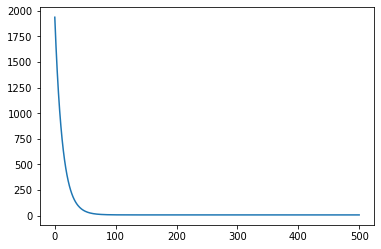

In [6]:
LR.plot_cost(cost,iteration)

In [7]:
theta2 = LR.normal_equation(X,y)
print(theta)
print(LR.mean_squared_error(X,y,theta))
print(theta2)
print(LR.mean_squared_error(X,y,theta2))

[1.67736309 9.78605174]
13.434657448478275
[4.27819549 9.40225564]
12.271701982228299


In [8]:
x_series = np.linspace(0,10,100)
print(x_series.shape)
x_series = np.insert(x_series[:,np.newaxis],0,1, axis=1)
print(x_series.shape)
y_pred = LR.predict(x_series, theta)
y_pred2 = LR.predict(x_series,theta2)

(100,)
(100, 2)


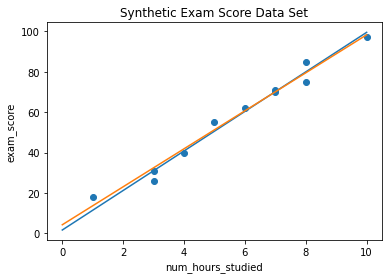

In [9]:
plt.scatter(num_hours_studied, exam_score)
plt.plot(x_series[:,1],y_pred)
plt.plot(x_series[:,1],y_pred2)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

## 2. Locally Weighted Linear Regression

In [10]:
class LWLRModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = X@theta
        return hypothesis
    
#2. Weights
    def w(self,X,x,tau):
        w = np.exp(-(np.sum(((X-x)**2),axis=1)/(2*(tau**2))))
        return w
    
#5. normal equation
    def normal_equation(self, X, y, w):
        W = np.diag(w)
        theta = np.linalg.inv(X.T@W@X)@X.T@W@y
        return theta
            
#5. predict
    def predict_point(self,X,x,tau):
        w = self.w(X,x,tau)
        theta = self.normal_equation(X, y, w)
        prediction = self.h(x,theta)
        return prediction
    
    def predict_multiple(self,X,x,tau):
        m_pred = x.shape[0]
        predictions = []
        for ix in range(m_pred):
            xx = x[ix]
            predictions.append(self.predict_point(X,xx,tau))
        predictions = np.array(predictions)
        return predictions

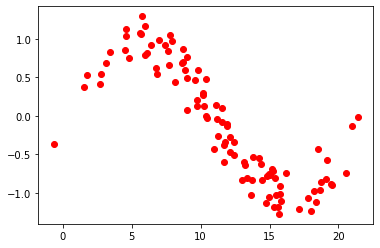

In [11]:
n = 100
x = np.random.normal(10, 5, [n,1])
y = np.sin(x/3.5) + np.random.normal(0,0.2, [n,1])

plt.plot(x,y,'ro')

In [12]:
X = np.insert(x,0,1,axis=1)

LWLR = LWLRModel()
LWLR.predict_point(X,np.array([1,4]),1)

array([0.823753])

In [13]:
x_series = np.linspace(-5,20,100)
x_series = np.insert(x_series[:,np.newaxis],0,1,axis=1)
print(x_series.shape)

y_pred = LWLR.predict_multiple(X,x_series,2)

(100, 2)


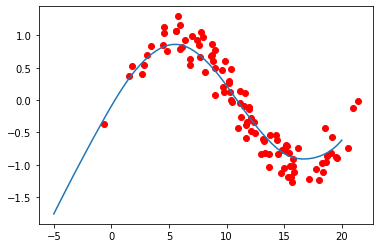

In [14]:
plt.plot(x,y,'ro')
plt.plot(x_series[:,1],y_pred)

## 3. Logistic Regression

In [15]:
class LogisticRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = 1/(1+np.exp(-X@theta))
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))
        else:
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))/(X.shape[0])
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = -X.T@(y-self.h(X,theta))
        else:
            dJ = -X.T@(y-self.h(X,theta))/(X.shape[0])
        return dJ
    
    def hessian(self, X, theta, average = False):
        y_pred = self.h(X,theta)
        if(average == False):
            hess_mat = X.T@X*(y_pred@(1-y_pred))
        else:
            hess_mat = X.T@X*(y_pred@(1-y_pred))/X.shape[0]
        return hess_mat
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            theta = theta - alpha*gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
    def newtons_method(self, X, y, initial_theta, max_iteration,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            hessian = self.hessian(X,theta,average)
            theta = theta - np.linalg.inv(hessian)@gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        prediction[prediction >= 0.5] = 1
        prediction[prediction < 0.5] = 0
        return prediction
    
#6. score/error calculation
    def r_squared(self,y,y_pred):
        r_square = 1 - ((np.square(y - y_pred)).sum())/((np.square(y - y.mean())).sum())
        return r_square
    
    def accuracy(self,y,y_pred):
        acc = (y == y_pred).sum()/y.size
        return acc
    
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(0,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

In [16]:
data = np.loadtxt('ex2data1.txt',delimiter = ',')

In [17]:
X = data[:,0:2]
y = data[:,2]

mean = np.mean(X,axis=0)
std = np.std(X,axis=0)

X = (X-mean)/std

X = np.insert(X,0,1,axis=1)

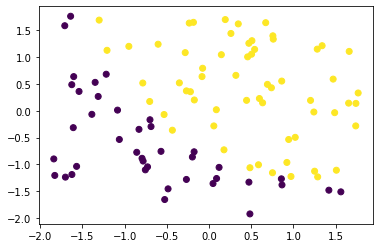

In [18]:
plt.scatter(X[:,1],X[:,2],c=y)

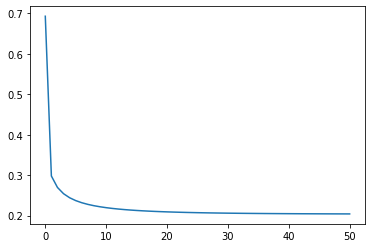

In [19]:
Log = LogisticRegressionModel()

iterations = 50
alpha = 5
initial_theta = np.zeros(3)

theta,cost,iteration_no = Log.batch_gd(X,y,initial_theta,iterations,alpha,average=True)

Log.plot_cost(cost,iteration_no)

In [20]:
y_pred = Log.predict(X,theta)
Log.accuracy(y,y_pred)

0.89

In [21]:
cost[-1]

0.2040756340460184

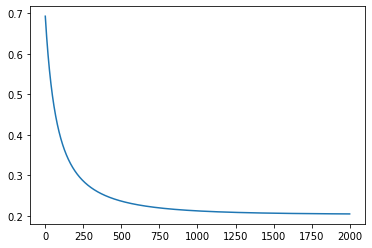

In [22]:
iterations = 2000

theta,cost,iteration_no = Log.newtons_method(X,y,initial_theta,iterations,average=True)

Log.plot_cost(cost,iteration_no)

In [23]:
y_pred = Log.predict(X,theta)
Log.accuracy(y,y_pred)

0.89

In [24]:
cost[-1]

0.20444214876081593

## 4. Softmax Regression


In [25]:
class SoftmaxRegressionModel:
    def Y(self,y):
        m = len(y)
        k = len(np.unique(y))
        Y = np.zeros((m,k))
        for j,kk in enumerate(np.unique(y)):
            Y[y==kk,j] = 1
        return Y
    
    def y(self,Y):
        y = np.argmax(Y,axis=1)
        return y
    
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = np.exp(X@theta)/np.sum(np.exp(X@theta),axis=1)[:,np.newaxis]
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = -np.sum(y*np.log(self.h(X,theta)))
        else:
            J = -np.sum(y*np.log(self.h(X,theta)))/(X.shape[0])
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = -X.T@(y-self.h(X,theta))
        else:
            dJ = -X.T@(y-self.h(X,theta))/(X.shape[0])
        return dJ
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            theta = theta - alpha*gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
#5. predict
    def predict_Y(self,X,theta):
        prediction = self.h(X,theta)
        prediction = prediction/np.max(prediction,axis=1)[:,np.newaxis]
        prediction[prediction < 1] = 0
        return prediction
    
    def predict_y(self,X,theta):
        prediction = self.h(X,theta)
        y = self.y(prediction)
        return y
    
#6. score/error calculation
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/y.size
        return acc
    
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(0,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

In [26]:
#IMPORT DATA
import pandas as pd

def replaceKeys(series):
    series_dict = {}
    for i,u in enumerate(series.unique()):
        series_dict[u] = i
    return series.replace(series_dict), series_dict

data = pd.read_csv("gender_height_weight.csv") 

gender_dict = {}
data['Gender'], gender_dict = replaceKeys(data['Gender'])
print(data.columns)

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')


In [27]:
#Split Data

X_all = (data[['Gender','Height','Weight']]).dropna().astype(float)
columns = X_all.columns

ix = np.arange(0,X_all.shape[0])
np.random.shuffle(ix)
percentage = 0.7

X_train = X_all[:int(percentage*X_all.shape[0])]
X_test = X_all[int(percentage*X_all.shape[0]):]

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_norm = (X_train-mean)/std
X_norm_test = (X_test-mean)/std
X_norm.insert(0,"Intercept",1)
X_norm_test.insert(0,"intercept",1)

print(X_norm.head())
print()
y = data['Index'].astype(float)
print(y.head())
y_train = y[:int(percentage*X_all.shape[0])]
y_test = y[int(percentage*X_all.shape[0]):]

m,n = X_norm.shape

k = y.unique().size

   Intercept    Gender    Height    Weight
0          1 -0.994302  0.228220 -0.313398
1          1 -0.994302  1.137980 -0.596102
2          1  1.005731  0.895377  0.126364
3          1  1.005731  1.501884 -0.062105
4          1 -0.994302 -1.288047 -1.412804

0    4.0
1    2.0
2    4.0
3    3.0
4    3.0
Name: Index, dtype: float64


In [28]:

k = len(y.unique())

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data

m, n = X_train.shape

# Initialize theta for each class  

In [29]:
SR = SoftmaxRegressionModel()

yy = SR.Y(y_train.values)

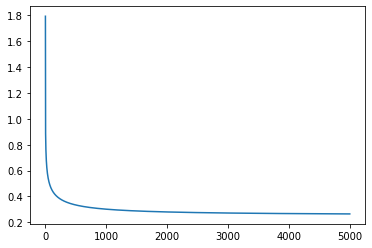

In [30]:
theta_initial = np.ones((n,k))

alpha = 5
iterations = 5000

theta,cost,iteration_no = SR.batch_gd(X_norm.values,yy,theta_initial,iterations,alpha,average=True)
SR.plot_cost(cost,iteration_no)

In [31]:
y_pred = SR.predict_y(X_norm_test.values,theta)

In [32]:
SR.accuracy(y_pred, y_test.values)

0.9333333333333333

## 5. Gaussian Discriminant Analysis

In [75]:
class GDAModel:
    
    def parameters(self,X,y,naive = False,same_sigma = True):
        unique_y = np.unique(y)
        prior = np.zeros(len(unique_y))
        mean = np.zeros((len(unique_y),X.shape[1]))
        sigma = np.zeros((len(unique_y),X.shape[1],X.shape[1]))
        for j, yi in enumerate(unique_y):
            prior[j] = np.sum(y==yi)/y.size
            mean[j] = np.mean(X[y==yi],axis=0)
            sigma[j] = (1/np.sum(y==yi))*(X[y==yi]-mean[j]).T@(X[y==yi]-mean[j])
            
        # sets 0 to covariance terms if using the naive assumption
        if(naive == True):
            sigma[:,~np.eye(X.shape[1],dtype=bool)] = 0
            
        # if we're using the same sigma for all classes, we take the average of them
        if(same_sigma == True):
            sigma[:] = np.mean(sigma,axis=0)
            
        return prior,mean,sigma,unique_y
    
    def joint_probability(self,x,prior,mean,sigma):
        joint_prob = np.zeros(prior.size)
        for j,mu in enumerate(mean):
            if(sigma.ndim == 2):
                sig = sigma
            else:
                sig = sigma[j]
            gaussian = (1/(((2*np.pi)**(x.size/2))*np.sqrt(np.linalg.det(sig))))*np.exp(-1/2*(x-mu)@np.linalg.inv(sig)@((x-mu)))
            joint_prob[j] = prior[j]*gaussian
        return joint_prob

    def predict(self,X,prior,mean,sigma,unique_y):
        if(X.ndim == 2):
            y_pred = []
            for i in range(X.shape[0]):
                joint_prob = self.joint_probability(X[i],prior,mean,sigma)
                y_pred.append(unique_y[np.argmax(joint_prob)])
            y_pred = np.array(y_pred)
        else:
            joint_prob = self.joint_probability(X,prior,mean,sigma)
            y_pred = unique_y[np.argmax(joint_prob)]
        return y_pred

#6. score/error calculation
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/y.size
        return acc

In [76]:
from sklearn.model_selection import train_test_split

# Load data from CSV file
def loadCsv(filename):
    data_raw = pd.read_csv(filename)
    headers = data_raw.columns
    dataset = data_raw.values
    return dataset, headers

def splitDataset(test_size,*arrays,**kwargs):
    return train_test_split(*arrays,test_size=test_size,**kwargs)

filename = 'diabetes.csv'
dataset, headers = loadCsv(filename)

X_train,X_test,y_train,y_test = splitDataset(0.4,dataset[:,:-1],dataset[:,-1])
print("Total =",len(dataset),"Train =", len(X_train),"Test =",len(X_test))

Total = 768 Train = 460 Test = 308


In [92]:
GDA = GDAModel()

prior,mean,sigma,unique_y = GDA.parameters(X_train,y_train,naive=False,same_sigma=True)

In [93]:
y_pred = GDA.predict(X_test,prior,mean,sigma,unique_y)

In [94]:
GDA.accuracy(y_pred,y_test)

0.7532467532467533

In [95]:
print(X_train)

[[  3.     80.     82.    ...  34.2     1.292  27.   ]
 [  0.    131.      0.    ...  43.2     0.27   26.   ]
 [  1.    131.     64.    ...  23.7     0.389  21.   ]
 ...
 [  1.    116.     78.    ...  36.1     0.496  25.   ]
 [  4.     92.     80.    ...  42.2     0.237  29.   ]
 [  6.     96.      0.    ...  23.7     0.19   28.   ]]


In [119]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
#print(model.get_params(True))
y_pred = model.predict_proba(X_test)

In [123]:
print(y_test.shape)

(308,)


(308,)


In [115]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold = precision_recall_curve(y_test,y_pred[:,1])

In [127]:
print(recall.shape)
print(precision.shape)
print(threshold.shape)

(285,)
(285,)
(284,)


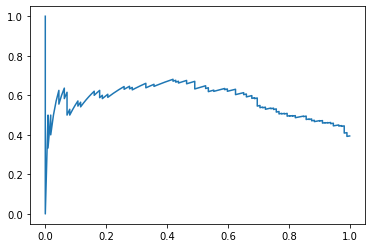

In [128]:
plt.plot(recall[:],precision[:])

## 6. Multinomial Naive Bayes

In [38]:
class MultinomialNaiveBayesModel:
    
    #1. Get frequencies -> dictionary of frequencies (used for creating the conditional probabilities, and also for getting the frequencies of each sample)
    #2. get parmaters -> from the frequency dictionary and y, get the prior, likelihood(conditional probability), and also the unique values of y
    #3. get joint_probability -> finds the joint probability for each of the class
    #4. predict -> uses the joint_probability function to find the probabilities of each class, then choses the class
    #5. accuracy -> takes in y and y_pred to get the accuracy. 
    
    def frequency_dict(self,dict_of_instances):
        from collections import Counter
        #takes in a list
        frequency_dict = {}
        for key,value in dict_of_instances.items():
            frequency_dict[key] = Counter(dict_of_instances[key])
        return frequency_dict
    
    def parameters(self,frequency_dict,y,alpha = 0):
        #expects X is a list of counter dictionaries
        unique_y = np.unique(y)
        prior = {}
        likelihood = {}
        
        for j,class_name in enumerate(unique_y):
            prior[class_name] = np.sum(y==unique_y[j])/y.size
            total_frequency = sum(frequency_dict[class_name].values())
            conditional_dictionary = {}
            for key,value in frequency_dict[class_name].items():
                conditional_dictionary[key] = (value+alpha)/(total_frequency+alpha*(len(frequency_dict[class_name])))
            conditional_dictionary["* unknown *"] = alpha/(total_frequency+alpha*(len(frequency_dict[class_name])))
            likelihood[class_name] = (conditional_dictionary)

        return prior,likelihood,unique_y
    
    def joint_probability(self,x,prior,likelihood):
        #similar to the function parameters, x is expected to be the frequency of each class
        joint_prob = np.zeros(len(prior))
        for j,(key,p_y) in enumerate(prior.items()):
            px_y = 1
            for xi in x:
                try:
                    px_y *= likelihood[key][xi]
                except:
                    px_y *= likelihood[key]["* unknown *"]
            joint_prob[j] = p_y*px_y
        return joint_prob

    def predict(self,X,prior,likelihood,unique_y):
        y_pred = []
        for i in range(len(X)):
            joint_prob = self.joint_probability(X[i],prior,likelihood)
            y_pred.append(unique_y[np.argmax(joint_prob)])
        y_pred = np.array(y_pred)
        return y_pred

#6. score/error calculation
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/y.size
        return acc

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/rom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
raw_data = pd.read_csv('spam.csv', encoding='latin-1')
raw_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
raw_data = raw_data.rename(columns={'v1': 'class','v2': 'sentence'})

raw_data.head()

,class,sentence
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
def get_words(sentence):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    nopunc = [char for char in sentence if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words
#raw_data['sentence'].apply(process_text).head()
#raw_data

In [42]:
train_data, test_data = train_test_split(raw_data.iloc[:,[0,1]], test_size = 0.2)
train_data.head()

,class,sentence
2528,ham,jay says he'll put in &lt;#&gt;
3689,ham,What happen dear tell me
4402,ham,Just getting back home
1194,ham,Ok... C ya...
1370,ham,Hope you are feeling great. Pls fill me in. Ab...


In [43]:
X_raw = train_data['sentence']
print(X_raw.values.shape)

(4457,)


In [44]:
ham_docs = [train['sentence'] for index,train in train_data.iterrows() if train['class'] == 'ham']
spam_docs = [train['sentence'] for index,train in train_data.iterrows() if train['class'] == 'spam']

In [45]:
spam_words = get_words(spam_docs)
ham_words = get_words(ham_docs)

In [46]:
X = {"ham":ham_words,"spam":spam_words}

In [47]:
MNB = MultinomialNaiveBayesModel()
tab = MNB.frequency_dict(X)

In [48]:
prior,likelihood,unique_y = MNB.parameters(tab,train_data['class'].values,alpha=0.0001)

In [49]:
test_docs = list([test['sentence'] for index,test in test_data.iterrows()])
X_test = [get_words(sentence) for sentence in test_docs]
#X_test = MNB.frequency_list(test_words)
#y = test_data['class'].values

In [50]:
y_pred = MNB.predict(X_test,prior,likelihood,unique_y)

In [51]:
print(y_pred[:100])

['ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham'
 'ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam'
 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'spam' 'spam' 'ham']


In [52]:
y = test_data['class'].values
print(y[:100])

['ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'spam' 'spam' 'ham']


In [53]:
MNB.accuracy(y,y_pred)

0.9551569506726457

## 7. SVM

In [54]:
from numpy import linalg
import cvxopt
import cvxopt.solvers
import pylab as pl

In [55]:
class SVMModel:
    
    def linear_kernel(self,x1, x2):
        return np.dot(x1, x2)

    def polynomial_kernel(self,x, y, p=2):
        return (1 + np.dot(x, y)) ** p

    def gaussian_kernel(self,x, y, sigma=0.9999):
        return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

    def fit(self, X, y, kernel, C):
        n_samples, n_features = X.shape

        # Gram matrix
        # initialize kernel matrix    
        K = np.zeros((n_samples, n_samples))
        # Kernel matrix

        for i in range(n_samples):
            for j in range(n_samples):
                if kernel == 'linear_kernel':
                    K[i,j] = self.linear_kernel(X[i], X[j])
                elif kernel == 'polynomial_kernel':
                    K[i,j] = self.polynomial_kernel(X[i], X[j])
                else:
                    K[i,j] = self.gaussian_kernel(X[i], X[j])


        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv_idx = a > 1e-5
        ind = np.arange(len(a))[sv_idx]
        a = a[sv_idx]    
        sv = X[sv_idx]
        sv_y = y[sv_idx]
        print("%d support vectors out of %d points" % (len(a), n_samples))

        # Intercept
        b = 0
        for n in range(len(a)):
            b += sv_y[n]
            b -= np.sum(a * sv_y * K[ind[n],sv_idx])
        b /= len(a)

        # Weight vector
        if kernel == 'linear_kernel':
            w = np.zeros(n_features)
            for n in range(len(a)):
                w += a[n] * sv_y[n] * sv[n]
        else:
            w = None
        return sv, sv_y, a, w, b

    def project(self,X, kernel,sv, sv_y, a, w, b):
        if w is not None:
            return np.dot(X, w) + b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a_val, sv_y_val, sv_val in zip(a, sv_y, sv):
                    if kernel == 'polynomial_kernel':
                        s += a_val * sv_y_val * self.polynomial_kernel(X[i], sv_val)
                    else:
                        s += a_val * sv_y_val * self.gaussian_kernel(X[i], sv_val)
                y_predict[i] = s
            return y_predict + b

    def predict(self,X, kernel, sv, sv_y, a, w, b):
        return np.sign(self.project(X, kernel,sv, sv_y, a, w, b))
    
    def plot_contour(self,X1_train, X2_train, kernel, sv, sv_y, a, w, b):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(sv[:,0], sv[:,1], s=100, c="g")
        # here we choose the range between -7 and 7 as we have choosen
        # the mean to be between -4 and 4 while generating data with the variance of 0.8
        X1, X2 = np.meshgrid(np.linspace(-7,7,50), np.linspace(-7,7,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = self.project(X, kernel,sv, sv_y, a, w, b).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

In [56]:
# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)
#X1[0] = np.array([8,8])

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)
X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

X = np.concatenate([X1, X2],axis = 0)
y = np.append(-np.ones(num_sample),np.ones(num_sample))

In [57]:
mean1 = np.array([0, 2])
mean2 = np.array([0, 0])
cov = np.array([[1.8, 1.6], [1.6, 1.8]])
X1 = np.random.multivariate_normal(mean1, cov, 100)
X2 = np.random.multivariate_normal(mean2, cov, 100)

X = np.concatenate([X1, X2],axis = 0)
y = np.append(-np.ones(len(X1)),np.ones(len(X2)))

In [58]:
SVM = SVMModel()

kernel = 'linear_kernel'

sv, sv_y, a, w, b = SVM.fit(X,y,kernel=kernel,C=1000)

     pcost       dcost       gap    pres   dres
 0:  4.0743e+05 -1.0906e+08  3e+08  6e-01  9e-12
 1:  1.0999e+06 -2.2505e+07  3e+07  4e-02  9e-12
 2:  4.2924e+05 -3.5942e+06  4e+06  4e-03  5e-12
 3:  1.1060e+04 -5.1060e+05  5e+05  2e-04  5e-12
 4: -1.5559e+04 -7.6462e+04  6e+04  2e-05  4e-12
 5: -1.8768e+04 -6.9949e+04  5e+04  1e-05  6e-12
 6: -1.8797e+04 -5.5506e+04  4e+04  6e-06  5e-12
 7: -2.1082e+04 -4.4515e+04  2e+04  2e-06  5e-12
 8: -2.2825e+04 -3.9962e+04  2e+04  2e-06  5e-12
 9: -2.4500e+04 -3.7400e+04  1e+04  1e-06  6e-12
10: -2.4063e+04 -3.6205e+04  1e+04  9e-07  5e-12
11: -2.5126e+04 -3.4354e+04  9e+03  5e-07  6e-12
12: -2.5893e+04 -3.1979e+04  6e+03  1e-07  7e-12
13: -2.6237e+04 -3.0525e+04  4e+03  7e-08  6e-12
14: -2.6372e+04 -3.0440e+04  4e+03  5e-08  6e-12
15: -2.7504e+04 -2.8965e+04  1e+03  7e-09  7e-12
16: -2.7719e+04 -2.8370e+04  7e+02  2e-09  8e-12
17: -2.7903e+04 -2.7994e+04  9e+01  4e-14  8e-12
18: -2.7944e+04 -2.7948e+04  3e+00  3e-13  8e-12
19: -2.7946e+04 -2.79

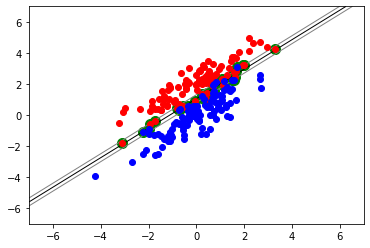

In [59]:
SVM.plot_contour(X1, X2, kernel, sv, sv_y, a, w, b)

In [60]:
resolution = 100
x_series = np.linspace(-2,2,resolution)
y_series = np.linspace(-2,2,resolution)

x_mesh,y_mesh = np.meshgrid(x_series,y_series)

x_mesh = x_mesh.reshape(-1,1)
y_mesh = y_mesh.reshape(-1,1)

mesh = np.append(x_mesh,y_mesh,axis=1)
y_pred = SVM.predict(mesh,kernel,sv,sv_y,a,w,b).astype(int)

x_mesh = x_mesh.reshape(resolution,resolution)
y_mesh = y_mesh.reshape(resolution,resolution)
y_pred = y_pred.reshape(resolution,resolution)

(-2.0, 2.0)

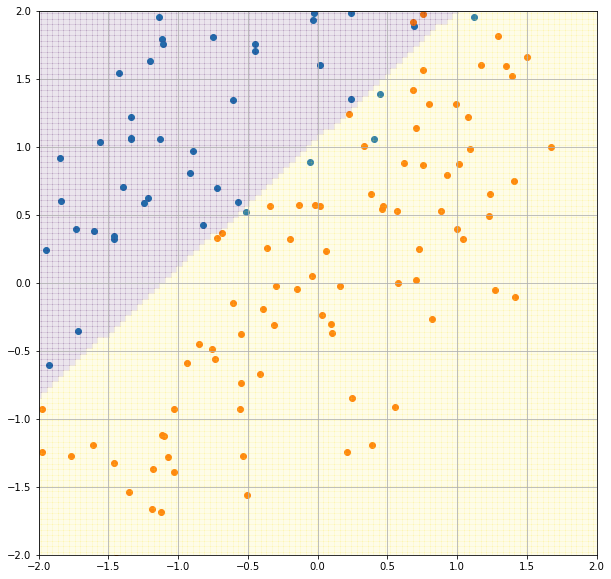

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.pcolormesh(x_mesh,y_mesh,y_pred,cmap='viridis',shading='auto',alpha=0.1)
plt.grid(True)
plt.xlim([-2,2])
plt.ylim([-2,2])

## **Preprocessing**

## 1. Standard Scaler

In [62]:
def standardScaler(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std
    return X_norm, mean, std

def standardUnScaler(X, mean, std):
    X_unscaled = X*std+mean
    return X_unscaled

X = np.array([[1,2],[3,4],[5,6]])
X_norm,mean,std = standardScaler(X)
print(X_norm)

[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


## 2. Min-Max Scaler

In [63]:
def minMaxScaler(X):
    mini = np.min(X,axis=0)
    maxi = np.max(X,axis=0)
    X_scaled = (X-mini)/(maxi-mini)
    return X_scaled, mini, maxi

def minMaxUnScaler(X, mini, maxi):
    X_unscaled = X*(maxi-mini)+mini
    return X_unscaled

X = np.array([[1,2],[3,4],[5,6]])
X_scaled,mini,maxi = minMaxScaler(X)
print(X_scaled)

[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


## Polynomial Features

In [64]:
from sklearn.preprocessing import PolynomialFeatures

def getPolynomialFeatures(X,degree):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)

X = np.array([[1,2],[3,4],[5,6]])

getPolynomialFeatures(X,3)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.]])

## Train Test Splitter

In [65]:
from sklearn.model_selection import train_test_split

def trainTestSplit(X,y,test_size=0.2,random_state=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=random_state)
    return X_train,X_test,y_train,y_test

X, y = np.arange(100).reshape((50, 2)), range(50)
X_train, X_test, y_train, y_test = trainTestSplit(X,y,test_size=0.3,random_state=None)

print("Shape Test:",X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))

Shape Test: 0.3


## Sklearn Libraries commonly used

In [66]:
#For linear models such as linear regression, ridge regression, lasso regression, etc
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge #Ridge doesn't make the feature go to 0 but we can find the normal equation for it
from sklearn.linear_model import Lasso #Lasso can make the feature go to 0
from sklearn.linear_model import ElasticNet #Combination of Lasso and ridge
from sklearn.linear_model import SGDRegressor #Stochastic Gradient Descent Regressor

#Model selection libraries
from sklearn.model_selection import GridSearchCV #Search for the correct model
from sklearn.model_selection import ShuffleSplit #Creates n splits of training and testing data which can be used as indices NOTE this is not the same as cross validation
from sklearn.model_selection import train_test_split #Splits dataset to training set and testing set
from sklearn.model_selection import KFold #Provides train/test indices to split data in train/test sets. Used for cross validation.

from sklearn.preprocessing import PolynomialFeatures #Creates polynomial features
from sklearn.preprocessing import StandardScaler #Scales the input using fit and transform, so we should use it to fit with the training set

from sklearn.pipeline import make_pipeline #creates a pipeline for a model. for example: putting polynomialfeatures in front of linear regression

from sklearn.datasets import make_regression #create dataset for regression

from sklearn.metrics import mean_squared_error #getting the mean_squared_error

from sklearn.exceptions import ConvergenceWarning

In [67]:
from sklearn.metrics import precision_recall_curve #compute precision recall pairs for different probability thresholds
from sklearn.metrics import average_precision_score #computes the average precision, AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:
from sklearn.metrics import classification_report #prints out basic classification reports such as recall, f1_score, etc.

from sklearn.naive_bayes import GaussianNB #gaussian naive bayes model

from sklearn.model_selection import StratifiedShuffleSplit #Shufflesplit in a way that takes account for the distribution of the dataset
from sklearn.model_selection import GridSearchCV #tool used to search for the best model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #idk how randomizedsearchcv works

from sklearn.preprocessing import label_binarize #creates Y from y[like in the softmax regression]

from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.linear_model import SGDClassifier #basically does regularization using stochastic gradient descent, probably better to just use sklearn.model_selection.RidgeClassifier or something like that

from sklearn.svm import SVC # "Support vector classifier

from sklearn.ensemble import BaggingClassifier # idk what this is

from sklearn.utils.fixes import loguniform #uniform distribution but in the log scale

from sklearn.datasets import make_classification #generate a random n classification set



In [129]:
kernel = ['linear', 'rbf', 'poly']
C_range = [1, 5, 10, 50]
gamma_range = [0.0001, 0.0005, 0.001, 0.005]

param_grid = dict(gamma=gamma_range, C=C_range, 
                  kernel=kernel)

In [132]:
from sklearn.svm import SVC

help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, default=1.0
 |      Regularization parame